In [41]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [42]:
### Load the data set and process the data ###
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
# -1 makes it so that it automatically detects the dimension (in this case from (28,28) -> (784,))
# Dividing by 255 normalizes the pixel values between 0 and 1
train_imgs_flat = train_imgs.reshape(train_imgs.shape[0], -1) / 255.0
test_imgs_flat = test_imgs.reshape(test_imgs.shape[0], -1) / 255.0

def one_hot_encode(labels, num_classes=10):
  one_hot_labels = np.zeros((labels.shape[0], num_classes))
  one_hot_labels[np.arange(labels.shape[0]), labels] = 1
  return one_hot_labels

In [43]:
# The neural network has 1 input layer, 1 hidden layer, and 1 output layer #
input_size = 784  # 28x28 pixels
hidden_size = 128  # This can be adjusted
output_size = 10  # There are 10 digits

# HE Initialization used for W1 and W2, good for ReLU activation functions
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / input_size)
b2 = np.zeros((1, output_size))

In [44]:
# Relu activation function used for the hidden layer
def relu(Z):
  return np.maximum(0, Z)

# Softmax activation function used for the output layer
def softmax(Z):
  return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

def forward_prop(X):
  # np.dot(input of that layer, w) + b_layer

  # Hidden Layer
  Z1 = np.dot(X, W1) + b1
  A1 = relu(Z1)

  # Output Layer
  Z2 = np.dot(A1, W2) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

# Multi Class Cross-Entropy Loss Function
def loss(y_hat, y): # y_hat: prediction, y: true value
  m = y.shape[0]
  y_one_hot = one_hot_encode(y)
  func = np.log(y_hat + 1e-15)
  loss = np.sum(y_one_hot * func) * (-1/m)
  return loss

def backward_prop(X, y, Z1, A1, Z2, A2):
  m = X.shape[0]

  # Output Layer Gradients
  dZ2 = A2 - one_hot_encode(y)
  dW2 = np.dot(A1.T, dZ2)/m
  db2 = np.sum(dZ2, axis=0, keepdims=True)/m

  # Hidden Layer Gradients
  dA1 = np.dot(dZ2, W2.T)
  dZ1 = dA1 * (Z1 > 0)  # dA1 * derivative of relu(Z1)
  dW1 = np.dot(X.T, dZ1)/m
  db1 = np.sum(dZ1, axis=0, keepdims=True)/m

  return dW1, db1, dW2, db2

def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha=0.01):
  # Paramater = Parameter - alpha (learning rate) * (gradient of loss with respect ot that parameter)
  W1 -= alpha * dW1
  b1 -= alpha * db1
  W2 -= alpha * dW2
  b2 -= alpha * db2
  return W1, b1, W2, b2

def train_model(X_train, y_train, epochs, alpha):
  # Batch Gradient Descent
  for epoch in range(epochs):
    # Full data set is used for batch
    X_batch = X_train
    y_batch = y_train

    # Forward Propagation -> Calculate Loss Function -> Backward Propagation
    Z1, A1, Z2, A2 = forward_prop(X_batch)
    curr_loss = loss(A2, y_batch)
    dW1, db1, dW2, db2 = backward_prop(X_batch, y_batch, Z1, A1, Z2, A2)

    # Update weights
    global W1, b1, W2, b2  # Want these variables to change outside of this function
    W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if epoch % 9 == 0:
      print(f"Epoch: {epoch+1}/{epochs}, Loss: {curr_loss:.3f}")

def predict(X):
  _, _, _, A2 = forward_prop(X)
  return np.argmax(A2, axis=1)

def accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

In [45]:
# Training the model
train_model(train_imgs_flat, train_labels, epochs=100, alpha=0.1)
predictions = predict(test_imgs_flat)
accuracy = accuracy(predictions, test_labels)*100
print(f"Test Accuracy: {accuracy:.3f}%")

Epoch: 1/100, Loss: 2.323
Epoch: 10/100, Loss: 2.079
Epoch: 19/100, Loss: 1.809
Epoch: 28/100, Loss: 1.498
Epoch: 37/100, Loss: 1.215
Epoch: 46/100, Loss: 1.004
Epoch: 55/100, Loss: 0.859
Epoch: 64/100, Loss: 0.759
Epoch: 73/100, Loss: 0.688
Epoch: 82/100, Loss: 0.634
Epoch: 91/100, Loss: 0.593
Epoch: 100/100, Loss: 0.560
Test Accuracy: 87.240%


Prediction: 6, True Label: 6



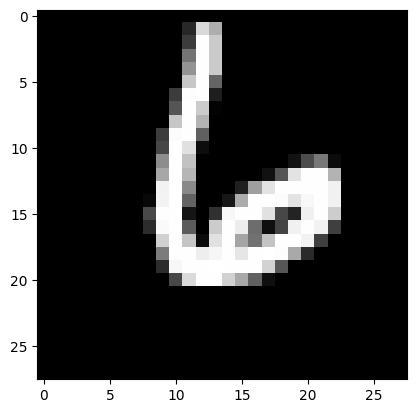

In [49]:
def test_prediction(digit):
    # Finds indices in the test set that are "digit"
    indices = np.where(test_labels == digit)[0]

    # Randomly chooses an index from indices
    rand_idx = np.random.choice(indices)

    img = test_imgs[rand_idx]
    true_label = test_labels[rand_idx]

    # Flatten and normalize the image
    img_flat = img.reshape(1, -1) / 255.0
    prediction = predict(img_flat)  # Model prediction

    # Display prediction and image
    plt.imshow(img, cmap='gray')
    print(f"Prediction: {prediction[0]}, True Label: {true_label}\n")
    plt.show()

test_prediction(6)